<a href="https://colab.research.google.com/github/AnkurKumarShukla/Machine-Learning-Fundamental-/blob/main/intern_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-5 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


         xmin       ymin        xmax        ymax  confidence  class    name
0   69.045731  60.046314  256.146790  166.518936    0.905773      2     car
1  120.656082  69.239891  143.978745   95.759247    0.288817      0  person


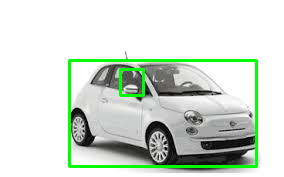

In [4]:
import torch
import numpy as np
import cv2
from PIL import Image
from pathlib import Path
from google.colab.patches import cv2_imshow
# Load YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Set device to CPU or GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load test image
image_path = '/content/download.jpg'
image = Image.open(image_path)

# Convert image to RGB
image = image.convert('RGB')

# Convert image to numpy array
image = np.array(image)

# Detect objects in image
results = model(image, size=640)

# Get detected objects and their confidence scores
objects = results.pandas().xyxy[0]

# Print detected objects and their confidence scores
print(objects)

# Draw bounding boxes around detected objects
for index, row in objects.iterrows():
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show image with detected objects
cv2_imshow( image)
cv2.waitKey(0)
cv2.destroyAllWindows()
